### Importing the necessary modules and loading the data:

In [1]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import plot_tree
from xgboost import plot_importance
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', 500)
countries=pd.read_csv('countries of the world.csv', decimal=',')
import warnings
warnings.filterwarnings('ignore')

### Checking the data:

We begin our analysis with some exploratory data analysis. We first check the columns, the shape of the distribution and about their statistics. To get a glimpse of how the data looks like, one can use the `head` and `tail` methods.

In [2]:
countries.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [3]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate       

Checking the statistics can give key insights about the distribution of various variables. This also helps in deciding which imputation method to use while dealing with missing data (this is discussed later in this kernel).

In [4]:
countries.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


Next, we quickly check how many rows for each feature has a null entry (this is just an easier way to get the sum of rows with missing data for a variable compared to the `info()` method).

In [5]:
countries.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

If you are curious about the missing data for a particular column feature., this example shows one way to do that.

In [6]:
countries[countries['Net migration'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
47,Cook Islands,OCEANIA,21388,240,89.1,50.00,NaN,NaN,5000.0,95.0,289.9,17.39,13.04,69.57,2.0,21.0,NaN,0.151,0.096,0.753
221,Wallis and Futuna,OCEANIA,16025,274,58.5,47.08,NaN,NaN,3700.0,50.0,118.6,5.00,25.00,70.00,2.0,NaN,NaN,NaN,NaN,NaN
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400


Machine learning models in Python do not entertain categorical data which means if we put these variables in our model then it will give an error.  Thus it is essential to check the data types before proceeding further, as shown here.  If the dtype is an object, it needs to be encoded. One of the ways to encode them is by using One Hot encoding where we will use Pandas `get_dummies` function.  As for the current data we have only two categorical variables: Country and Region. We will get back to this point when we start building our model.

In [7]:
countries.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

For further analysis, I am keen which regions are there and the number of countries that fall into them, their population and their total area.  To do such operations we use `groupby` function which helps in segregating the data into groups and then one can apply any function to either selected columns or to all.  Here, I first grouped the data by 'Region' then counted the number of countries as well as the total population and area that fall under each region.

In [8]:
countries_grouped= countries.groupby('Region')[['Country','Population','Area (sq. mi.)']].agg({'Country':'count', 'Population':'sum','Area (sq. mi.)':'sum'})
countries_grouped

,Country,Population,Area (sq. mi.)
Region,,,
ASIA (EX. NEAR EAST),28,3687982236,23096712
BALTICS,3,7184974,175015
C.W. OF IND. STATES,12,280081548,22100843
EASTERN EUROPE,12,119914717,1152222
LATIN AMER. & CARIB,45,561824599,20544084
NEAR EAST,16,195068377,4355586
NORTHERN AFRICA,6,161407133,6018890
NORTHERN AMERICA,5,331672307,21782471
OCEANIA,21,33131662,8519812


In case you are curious about the region specific distribution of the countries and their details about the various features, you can find it here. To obtain data in that format I created a multi-index using `set_index` method as shown here. Here, I am only showing a few rows using `head` method.

In [9]:
countries_indexed= countries.set_index(['Region','Country']).sort_index()
countries_indexed.head(3)

Population  Area (sq. mi.)  \
Region                        Country                                    
ASIA (EX. NEAR EAST)          Afghanistan     31056997          647500   
                              Bangladesh     147365352          144000   
                              Bhutan           2279723           47000   

                                            Pop. Density (per sq. mi.)  \
Region                        Country                                    
ASIA (EX. NEAR EAST)          Afghanistan                         48.0   
                              Bangladesh                        1023.4   
                              Bhutan                              48.5   

                                            Coastline (coast/area ratio)  \
Region                        Country                                      
ASIA (EX. NEAR EAST)          Afghanistan                            0.0   
                              Bangladesh                             0.4   
                              Bhutan                                 0.0   

                                            Net migration  \
Region                        Country                       
ASIA (EX. NEAR EAST)          Afghanistan           23.06   
                              Bangladesh            -0.71   
                              Bhutan                 0.00   

                                            Infant mortality (per 1000 births)  \
Region                        Country                                            
ASIA (EX. NEAR EAST)          Afghanistan                               163.07   
                              Bangladesh                                 62.60   
                              Bhutan                                    100.44   

                                            GDP ($ per capita)  Literacy (%)  \
Region                        Country                                          
ASIA (EX. NEAR EAST)          Afghanistan                700.0          36.0   
                              Bangladesh                1900.0          43.1   
                              Bhutan                    1300.0          42.2   

                                            Phones (per 1000)  Arable (%)  \
Region                        Country                                       
ASIA (EX. NEAR EAST)          Afghanistan                 3.2       12.13   
                              Bangladesh                  7.3       62.11   
                              Bhutan                     14.3        3.09   

                                            Crops (%)  Other (%)  Climate  \
Region                        Country                                       
ASIA (EX. NEAR EAST)          Afghanistan        0.22      87.65      1.0   
                              Bangladesh         3.07      34.82      2.0   
                              Bhutan             0.43      96.48      2.0   

                                            Birthrate  Deathrate  Agriculture  \
Region                        Country                                           
ASIA (EX. NEAR EAST)          Afghanistan       46.60      20.34        0.380   
                              Bangladesh        29.80       8.27        0.199   
                              Bhutan            33.65      12.70        0.258   

                                            Industry  Service  
Region                        Country                          
ASIA (EX. NEAR EAST)          Afghanistan      0.240    0.380  
                              Bangladesh       0.198    0.603  
                              Bhutan           0.379    0.363

### Dealing with the missing data:
As seen above, we have 14 columns out of 20 that have missing entries. If we drop all these missing entries (as shown next), we lose 21% of out data.

In [10]:
countries_dropped=countries.dropna()
countries_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 20 columns):
Country                               179 non-null object
Region                                179 non-null object
Population                            179 non-null int64
Area (sq. mi.)                        179 non-null int64
Pop. Density (per sq. mi.)            179 non-null float64
Coastline (coast/area ratio)          179 non-null float64
Net migration                         179 non-null float64
Infant mortality (per 1000 births)    179 non-null float64
GDP ($ per capita)                    179 non-null float64
Literacy (%)                          179 non-null float64
Phones (per 1000)                     179 non-null float64
Arable (%)                            179 non-null float64
Crops (%)                             179 non-null float64
Other (%)                             179 non-null float64
Climate                               179 non-null float64
Birthrate       

In order to avoid loss of 21% of data, we fill the missing values in all 'NaN' containing columns. As median is a better statistical parameter here than mean because of some skewness of data in variables, we fill the missing values with the median of each region obtained for each variable.  Only in the case of  'Climate' column which has categorical data, the missing data is filled by the mode of that specific region. Dealing with missing values is a crucial step in any data analysis. Therefore, before deciding which parameter to use to fill the missing value, the distribution of the data should be carefully observed. Then we can check that we have filled all the missing values by using `isnull().sum()` function on dataframe (as done before).

In [11]:
countries['Climate'] = countries.groupby('Region')['Climate'].transform(lambda x: x.fillna(x.mode().max()))

In [12]:
lst=['Net migration','Infant mortality (per 1000 births)','GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Arable (%)','Crops (%)','Other (%)','Birthrate','Deathrate','Agriculture','Industry','Service']
for col in countries.columns:
    if countries[col].isnull().sum()!=0:
        if col in lst:
            countries[col] = countries.groupby('Region')[col].transform(lambda x: x.fillna(x.median()))

In [13]:
countries.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

### Plotting and analysing the data:

After fixing all the missing values, it is time to check plots and see if we can find any interesting correlation between these variables. Here, we are using matplotlib and seaborn libraries for plotting. As can be observed from the heatmap below, GDP(% per capita) is showing a strong negative correlation with Infant mortality (per 1000 births), Birthrate and Agriculture. Also, it is showing a very strong positive correlation with Phones (per 1000) and a moderate positive correlation with Literacy(%) and Service. Moreover, it has some weak positive correlation with Net migration.  Additionally, Literacy(%) is showing strong negative correlation with Infant mortality (per 1000 births), Birthrate and Agriculture. In addition to GDP(% per capita), Literacy(%) is showing moderate positive correlation with Phones (per 1000), Service. Also, we find that agriculture is strongly positively correlated with Infant mortality (per 1000 births) and Birthrate, while it is negatively correlated with Service and Phone (per 1000) and as indicated before with  GDP(% per capita), Literacy(%).

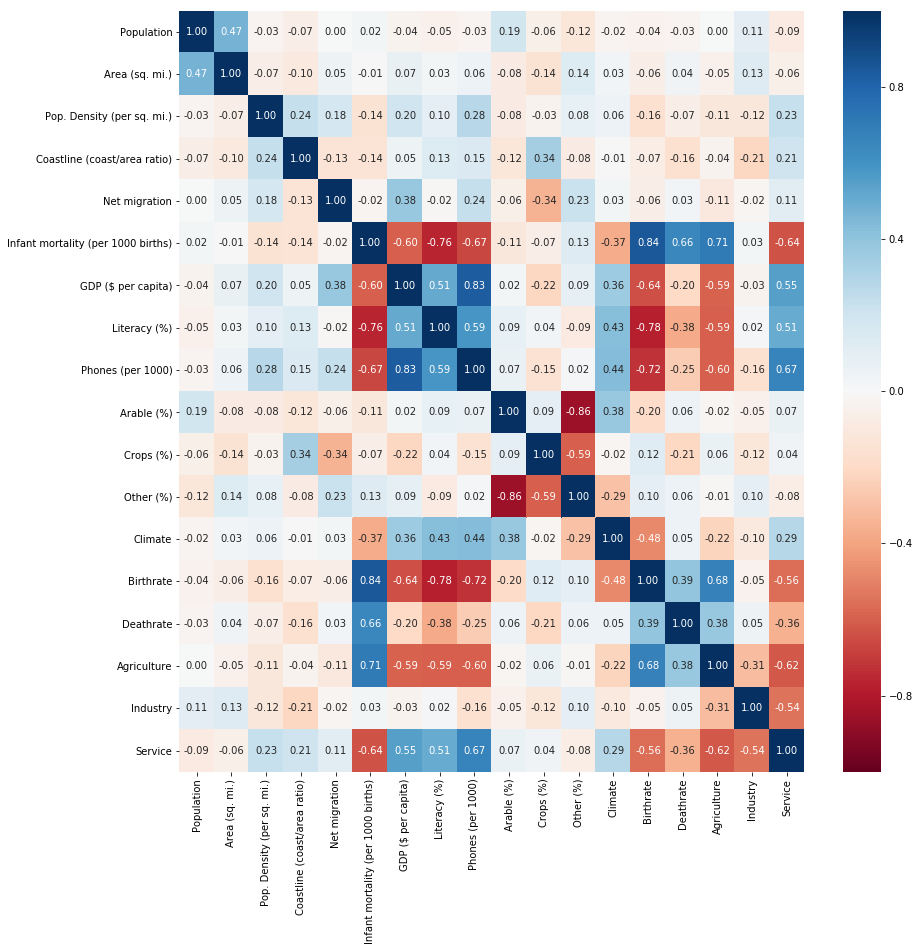

In [14]:
fig,ax=plt.subplots(figsize=(14,14))
sns.heatmap(countries.corr(), annot=True, vmin=-1, vmax=1,fmt = ".2f", cmap = 'RdBu')
plt.show()

One of the ways to visualize the correlation between various variables is by seaborn's pairplot. We try to see correlation between GDP(% per capita) and other factors that were showing positive or negative correlation with it. But, while doing that we can also observe the correlation among other factors as well. The diagonal subplots in pairplots are showing the region specific distribution of the variables.

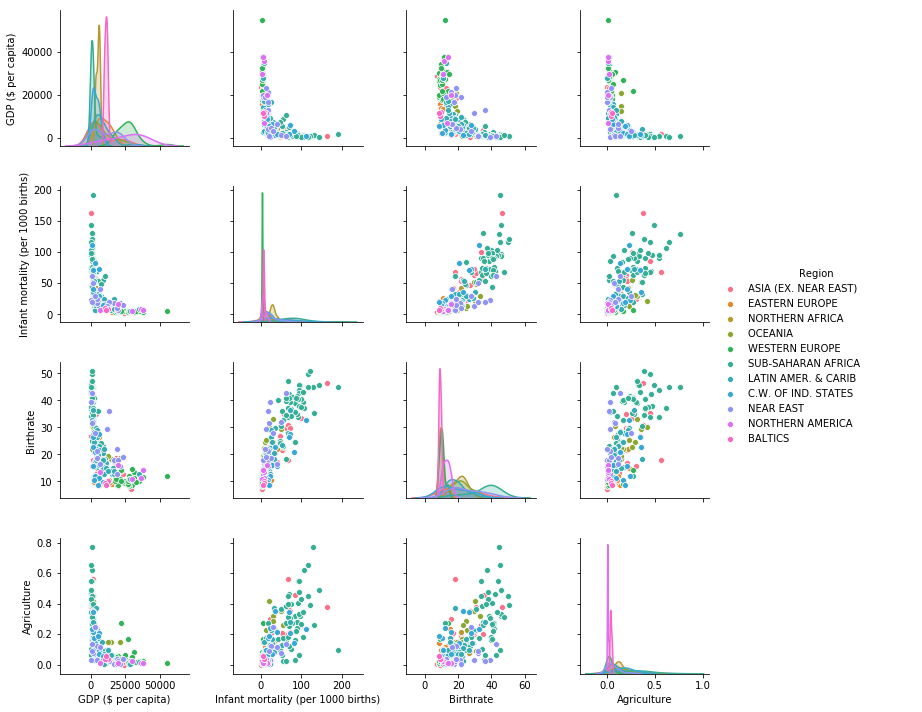

In [15]:
sns.pairplot(countries, vars= ['GDP ($ per capita)','Infant mortality (per 1000 births)', 'Birthrate','Agriculture'],hue='Region',diag_kind="kde")

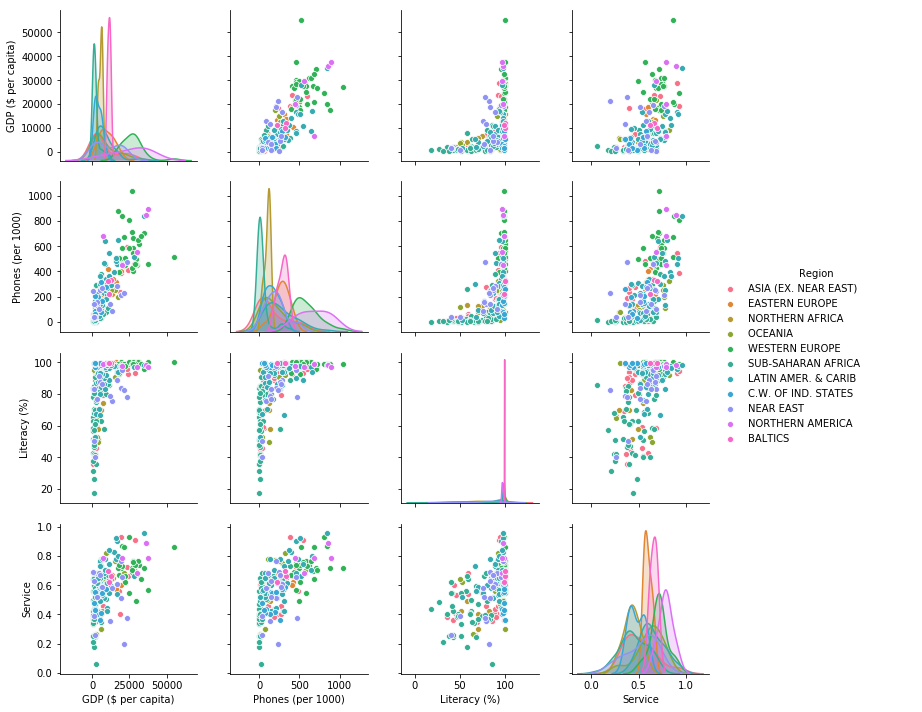

In [16]:
sns.pairplot(countries, vars= ['GDP ($ per capita)','Phones (per 1000)', 'Literacy (%)','Service'],hue='Region',diag_kind="kde")

An interesting observation (but well-known and obvious) can be made from the following two bar graphs below: GDP (\$ per capita) for various regions and the population distribution of these regions. Sadly, some populated regions have low GDP (\$ per capita).

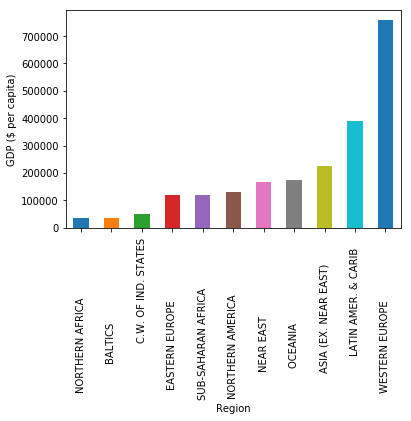

In [17]:
countries.groupby('Region')['GDP ($ per capita)'].sum().sort_values().plot(kind='bar')
plt.ylabel('GDP ($ per capita)')
plt.show()

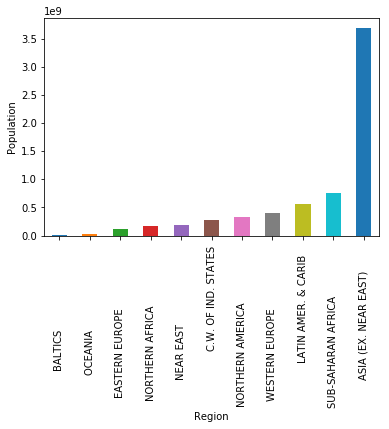

In [18]:
countries.groupby('Region')['Population'].sum().sort_values().plot(kind='bar')
plt.ylabel('Population')
plt.show()

### Building a model for predicting GDP (per capita):
As we have already observed from the pairplots that GDP ($ per capita) is showing non linear relationship with most of the variables, therefore, we move straight to play with Random Forest and  XGBoost for building a predictive model.  
But, before we start building our model we have to get rid of categorical data that has `dtype` 'object', as machine learning models give errors with categorical data. We will encode them using get_dummies function. Here, we encode the 'Region' column of the dataframe. By encoding we create individual column for each value of the 'Region' column. After that we delete the 'Region' column from the new dataframe that we made after encoding. Moreover, we also drop 'Countries' column which is 'object' dtype and we do not need it further. 

In [19]:
countries2= pd.concat([countries,pd.get_dummies(countries['Region'], prefix='region')], axis=1).drop(['Region'],axis=1)
print(countries2.head())
print(countries2.dtypes)
print(countries2.shape)

           Country  Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
0     Afghanistan     31056997          647500                        48.0   
1         Albania      3581655           28748                       124.6   
2         Algeria     32930091         2381740                        13.8   
3  American Samoa        57794             199                       290.4   
4         Andorra        71201             468                       152.1   

   Coastline (coast/area ratio)  Net migration  \
0                          0.00          23.06   
1                          1.26          -4.93   
2                          0.04          -0.39   
3                         58.29         -20.71   
4                          0.00           6.60   

   Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
0                              163.07               700.0          36.0   
1                               21.52              4500.0          86.5   
2    

Here, we first try Random Forest. For checking the model's quality we are using Root Mean Square Error (RMSE) and R2. R2 is the proportion of variability that is explained by our model. It ranges from 0-1 for maximum proportion of variability explained . 

In [20]:
y = countries2['GDP ($ per capita)']
X = countries2.drop(['GDP ($ per capita)','Country'], axis=1)

forest_model = RandomForestRegressor(random_state=21)
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
rmse= np.sqrt(np.mean(-cross_val_score(forest_model, train_X, train_y,cv=5,  scoring='neg_mean_squared_error')))
print("RMSE : %f" % (rmse))
r2_score1= np.mean(cross_val_score(forest_model, train_X, train_y,cv=5,  scoring='r2'))
print("R2 score: %s" % '{:.2}'.format(r2_score1))


RMSE : 4578.575684
R2 score: 0.77


Before proceeding further, we need the best parameters for our RandomForestRegressor. We try to find them using RandomSearchCV followed by GridSearchCV. RandomSearchCV helps to narrow down the number and range of parameters, which can then be tested using GridSearchCV. 

In [21]:
number_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': number_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Total number of combinations available are 4320. In RandomizedSearchCV not all parameters are tried but a fixed number of combinations is tested using  `n_iter` . It is tradeoff between computing time and quality of the solution

In [22]:
forest_model = RandomForestRegressor(random_state=21)
rf_random = RandomizedSearchCV(estimator = forest_model, param_distributions = random_grid, 
                          cv = 5, n_jobs = -1,n_iter = 100, verbose = 0)
rf_random.fit(train_X, train_y)
print(rf_random.best_params_)

{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}


Random search helps to narrow down the range for all the hyperparameters. This is then followed by GridSearch CV where we can test all the combinations of the parameters unlike Random search. 

In [23]:
param_grid = {'max_depth': [10, 20, 40, 60, 80],
              'max_features': ['sqrt'],
              'min_samples_leaf': [1, 3, 4, 5],
              'min_samples_split': [2, 4, 8],
              'n_estimators': [100, 300, 600, 1000],
             'bootstrap': [False, True]}
# Create a basic model
rf = RandomForestRegressor(random_state=21)
# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 0)
rf_grid.fit(train_X, train_y)
print(rf_grid.best_params_)

{'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}


Next we check RMSE and R2 score for the hyperparameter tuned RandomForest. There is an improvement in RMSE score compared to the simplest RandomForestRegressor model used above.

In [24]:
rf_cv_random=RandomForestRegressor(random_state=21,n_estimators= 600, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 40, bootstrap= False)
rf_cv_random.fit(train_X,train_y )
predictions=rf_cv_random.predict(test_X)
rmse3 = np.sqrt(mean_squared_error(test_y, predictions))
print("RMSE : %f" % (rmse3))
r23= r2_score(test_y,predictions)
print("R2 score: %s" % '{:.2}'.format(r23))


RMSE : 4449.789861
R2 score: 0.76


Now, we try XGBoost and compare the RMSE from both the models.  As expected the RMSE reduces and R2 score increases for XGBoost.

In [25]:
model_x = XGBRegressor(random_state=21)
model_x.fit(train_X, train_y, verbose=False)
predictions4 = model_x.predict(test_X)

rmse4 = np.sqrt(mean_squared_error(test_y, predictions4))
print("RMSE: %f" % (rmse4))
r24= r2_score(test_y,predictions4)
print("R2 score: %s" % '{:.2}'.format(r24))

RMSE: 4135.353501
R2 score: 0.79


Next, we try hyperparameter tuning for XGBoost. The best parameters obtained : {'colsample_bytree': 0.6, 'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.6}

In [26]:
#param_grid = {'n_estimators':[100,500,1000],'learning_rate': [0.001,0.01,0.05,0.1,1], 'max_depth': [3, 4, 5,6], 'subsample': [0.6, 0.8, 1.0],'colsample_bytree': [0.6, 0.8, 1.0],'gamma': [0.5, 1, 1.5, 2, 5]}
#model_x = XGBRegressor(random_state=21)
#xgb = GridSearchCV(estimator = model_x, param_grid = param_grid, 
#                          cv = 5, n_jobs = -1, verbose = 0)
#xgb.fit(train_X, train_y)
#print(xgb.best_params_)

In [27]:
train_X = pd.DataFrame(data=train_X, columns=X.columns)
test_X = pd.DataFrame(data=test_X, columns=X.columns)
model_x2 = XGBRegressor(n_estimators=500, learning_rate=0.01,max_depth= 4, subsample=0.6,gamma= 0.5,colsample_bytree= 0.6,random_state=21)
model_x2.fit(train_X, train_y)
predictions2 = model_x2.predict(test_X)

rmse2 = np.sqrt(mean_squared_error(test_y, predictions2))
print("RMSE: %f" % (rmse2))
r22= r2_score(test_y,predictions2)
print("R2 score: %s" % '{:.2}'.format(r22))

RMSE: 4107.755088
R2 score: 0.79


Now, using XGBoost's plot_importance function, we find the important features. 

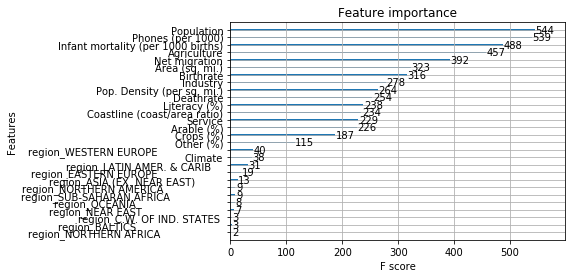

In [28]:
plot_importance(model_x2)

Now, we take the top 7 important features and use XGBoost for model prediction. This improved both RMSE and R2 scores suggesting that these are the key players. Including other features resulted in increasing RMSE and reducing R2.

In [29]:
y = countries2['GDP ($ per capita)']
X = countries2[['Population','Phones (per 1000)','Infant mortality (per 1000 births)','Agriculture','Net migration','Area (sq. mi.)','Birthrate']]
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
train_X = pd.DataFrame(data=train_X, columns=X.columns)
test_X = pd.DataFrame(data=test_X, columns=X.columns)
model_x3 = XGBRegressor(n_estimators=500, learning_rate=0.01,max_depth= 4, subsample=0.6,gamma= 0.5,colsample_bytree= 0.6,random_state=21)
model_x3.fit(train_X, train_y)
predictions3 = model_x3.predict(test_X)

rmse3 = np.sqrt(mean_squared_error(test_y, predictions3))
print("RMSE: %f" % (rmse3))
r23= r2_score(test_y,predictions3)
print("R2 score: %s" % '{:.2}'.format(r23))

RMSE: 3790.908537
R2 score: 0.82


### Conclusion 
In this analysis we build a predictive model using XGBoost which showed R2 score of 0.83. Also, from this dataset, we found the key features for predicting GDP (% per capita) are : Population, Phones (per 1000), Infant mortality (per 1000 births), Agriculture, Net migration, Area (sq. mi.) and Birthrate